In [1]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import regularizers



Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
x = boston.data
x.shape

(506, 13)

In [5]:
y = boston.target

In [6]:
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [8]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
['{:f}'.format(x) for x in x[0]]


['0.006320',
 '18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']

In [10]:
type(boston.data)

numpy.ndarray

In [11]:
len(x[:,1])

506

In [12]:
x.shape

(506, 13)

In [13]:
# respounder = x[:,1]

In [14]:
# predictors = np.delete(x, 0, 1) 

In [15]:
# print(predictors)

In [16]:
# predictors.shape

In [17]:
# x=np.reshape(x, (-1,1))
# y=np.reshape(y, (-1,1))
# scaler = MinMaxScaler()
# print(scaler.fit(x))
# print(scaler.fit(y))
# xscale=scaler.transform(x)
# yscale=scaler.transform(y)

In [18]:
model = Sequential()
model.add(Dense(13, input_dim=13,use_bias=True, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu',use_bias=True, kernel_regularizer=regularizers.l2(l=0.1)))
model.add(Dense(1,use_bias=True, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


In [20]:
history = model.fit(x,y, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)


Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 688us/step - loss: 791.7072 - mean_squared_error: 790.7129 - mean_absolute_error: 26.0074 - val_loss: 74.8610 - val_mean_squared_error: 73.8845 - val_mean_absolute_error: 6.9679
Epoch 2/1000
404/404 [==============================] - 0s 34us/step - loss: 355.8035 - mean_squared_error: 354.8379 - mean_absolute_error: 16.1698 - val_loss: 241.1297 - val_mean_squared_error: 240.1807 - val_mean_absolute_error: 14.1501
Epoch 3/1000
404/404 [==============================] - 0s 31us/step - loss: 199.4849 - mean_squared_error: 198.5466 - mean_absolute_error: 10.7953 - val_loss: 544.5982 - val_mean_squared_error: 543.6770 - val_mean_absolute_error: 21.8136
Epoch 4/1000
404/404 [==============================] - 0s 29us/step - loss: 179.8081 - mean_squared_error: 178.8977 - mean_absolute_error: 9.7934 - val_loss: 411.2692 - val_mean_squared_erro

404/404 [==============================] - 0s 31us/step - loss: 62.5610 - mean_squared_error: 62.0548 - mean_absolute_error: 5.6767 - val_loss: 24.6391 - val_mean_squared_error: 24.1357 - val_mean_absolute_error: 3.7542
Epoch 35/1000
404/404 [==============================] - 0s 30us/step - loss: 61.6548 - mean_squared_error: 61.1532 - mean_absolute_error: 5.6523 - val_loss: 24.1906 - val_mean_squared_error: 23.6919 - val_mean_absolute_error: 3.6897
Epoch 36/1000
404/404 [==============================] - 0s 31us/step - loss: 61.3038 - mean_squared_error: 60.8066 - mean_absolute_error: 5.6396 - val_loss: 23.3214 - val_mean_squared_error: 22.8268 - val_mean_absolute_error: 3.6371
Epoch 37/1000
404/404 [==============================] - 0s 33us/step - loss: 61.3853 - mean_squared_error: 60.8927 - mean_absolute_error: 5.4522 - val_loss: 22.9823 - val_mean_squared_error: 22.4922 - val_mean_absolute_error: 3.5961
Epoch 38/1000
404/404 [==============================] - 0s 31us/step - loss: 

404/404 [==============================] - 0s 30us/step - loss: 49.8006 - mean_squared_error: 49.3574 - mean_absolute_error: 4.8860 - val_loss: 17.8353 - val_mean_squared_error: 17.3927 - val_mean_absolute_error: 3.1302
Epoch 70/1000
404/404 [==============================] - 0s 30us/step - loss: 48.5342 - mean_squared_error: 48.0911 - mean_absolute_error: 5.0111 - val_loss: 26.0074 - val_mean_squared_error: 25.5639 - val_mean_absolute_error: 4.1810
Epoch 71/1000
404/404 [==============================] - 0s 33us/step - loss: 47.9535 - mean_squared_error: 47.5105 - mean_absolute_error: 5.1152 - val_loss: 17.5421 - val_mean_squared_error: 17.0998 - val_mean_absolute_error: 3.1501
Epoch 72/1000
404/404 [==============================] - 0s 33us/step - loss: 48.3527 - mean_squared_error: 47.9105 - mean_absolute_error: 4.7693 - val_loss: 19.8724 - val_mean_squared_error: 19.4297 - val_mean_absolute_error: 3.4851
Epoch 73/1000
404/404 [==============================] - 0s 32us/step - loss: 

404/404 [==============================] - 0s 35us/step - loss: 42.9956 - mean_squared_error: 42.5450 - mean_absolute_error: 5.2301 - val_loss: 21.0703 - val_mean_squared_error: 20.6200 - val_mean_absolute_error: 3.5485
Epoch 105/1000
404/404 [==============================] - 0s 31us/step - loss: 39.3840 - mean_squared_error: 38.9340 - mean_absolute_error: 4.4483 - val_loss: 19.8949 - val_mean_squared_error: 19.4446 - val_mean_absolute_error: 3.2991
Epoch 106/1000
404/404 [==============================] - 0s 30us/step - loss: 39.2617 - mean_squared_error: 38.8110 - mean_absolute_error: 4.6486 - val_loss: 21.7536 - val_mean_squared_error: 21.3027 - val_mean_absolute_error: 3.6356
Epoch 107/1000
404/404 [==============================] - 0s 32us/step - loss: 38.6856 - mean_squared_error: 38.2346 - mean_absolute_error: 4.6053 - val_loss: 20.1783 - val_mean_squared_error: 19.7274 - val_mean_absolute_error: 3.3891
Epoch 108/1000
404/404 [==============================] - 0s 33us/step - lo

Epoch 139/1000
404/404 [==============================] - 0s 52us/step - loss: 33.4061 - mean_squared_error: 32.9477 - mean_absolute_error: 4.2265 - val_loss: 22.2629 - val_mean_squared_error: 21.8042 - val_mean_absolute_error: 3.6033
Epoch 140/1000
404/404 [==============================] - 0s 44us/step - loss: 33.4494 - mean_squared_error: 32.9904 - mean_absolute_error: 4.3928 - val_loss: 22.4279 - val_mean_squared_error: 21.9690 - val_mean_absolute_error: 3.5770
Epoch 141/1000
404/404 [==============================] - 0s 38us/step - loss: 33.0842 - mean_squared_error: 32.6253 - mean_absolute_error: 4.2523 - val_loss: 22.1961 - val_mean_squared_error: 21.7371 - val_mean_absolute_error: 3.5214
Epoch 142/1000
404/404 [==============================] - 0s 34us/step - loss: 33.3944 - mean_squared_error: 32.9355 - mean_absolute_error: 4.2297 - val_loss: 22.9014 - val_mean_squared_error: 22.4421 - val_mean_absolute_error: 3.6567
Epoch 143/1000
404/404 [==============================] - 0s

Epoch 174/1000
404/404 [==============================] - 0s 41us/step - loss: 35.6919 - mean_squared_error: 35.2313 - mean_absolute_error: 4.4092 - val_loss: 27.5769 - val_mean_squared_error: 27.1155 - val_mean_absolute_error: 4.2294
Epoch 175/1000
404/404 [==============================] - 0s 31us/step - loss: 32.3476 - mean_squared_error: 31.8861 - mean_absolute_error: 4.4184 - val_loss: 22.4879 - val_mean_squared_error: 22.0269 - val_mean_absolute_error: 3.5451
Epoch 176/1000
404/404 [==============================] - 0s 31us/step - loss: 31.1627 - mean_squared_error: 30.7017 - mean_absolute_error: 4.1399 - val_loss: 24.1080 - val_mean_squared_error: 23.6465 - val_mean_absolute_error: 3.7783
Epoch 177/1000
404/404 [==============================] - 0s 32us/step - loss: 30.3750 - mean_squared_error: 29.9134 - mean_absolute_error: 4.1905 - val_loss: 23.1199 - val_mean_squared_error: 22.6584 - val_mean_absolute_error: 3.6338
Epoch 178/1000
404/404 [==============================] - 0s

Epoch 209/1000
404/404 [==============================] - 0s 34us/step - loss: 30.9470 - mean_squared_error: 30.4850 - mean_absolute_error: 4.0814 - val_loss: 28.4029 - val_mean_squared_error: 27.9403 - val_mean_absolute_error: 4.0382
Epoch 210/1000
404/404 [==============================] - 0s 36us/step - loss: 28.3704 - mean_squared_error: 27.9076 - mean_absolute_error: 4.0358 - val_loss: 27.9968 - val_mean_squared_error: 27.5341 - val_mean_absolute_error: 3.9881
Epoch 211/1000
404/404 [==============================] - 0s 35us/step - loss: 27.9046 - mean_squared_error: 27.4416 - mean_absolute_error: 3.9592 - val_loss: 26.2576 - val_mean_squared_error: 25.7944 - val_mean_absolute_error: 3.8100
Epoch 212/1000
404/404 [==============================] - 0s 35us/step - loss: 27.8318 - mean_squared_error: 27.3687 - mean_absolute_error: 3.9226 - val_loss: 23.6938 - val_mean_squared_error: 23.2306 - val_mean_absolute_error: 3.4773
Epoch 213/1000
404/404 [==============================] - 0s

Epoch 244/1000
404/404 [==============================] - 0s 46us/step - loss: 25.8566 - mean_squared_error: 25.3883 - mean_absolute_error: 3.7708 - val_loss: 24.9956 - val_mean_squared_error: 24.5269 - val_mean_absolute_error: 3.5902
Epoch 245/1000
404/404 [==============================] - 0s 41us/step - loss: 25.3445 - mean_squared_error: 24.8757 - mean_absolute_error: 3.7143 - val_loss: 25.5630 - val_mean_squared_error: 25.0937 - val_mean_absolute_error: 3.6484
Epoch 246/1000
404/404 [==============================] - 0s 44us/step - loss: 25.4621 - mean_squared_error: 24.9926 - mean_absolute_error: 3.8011 - val_loss: 24.9163 - val_mean_squared_error: 24.4470 - val_mean_absolute_error: 3.5780
Epoch 247/1000
404/404 [==============================] - 0s 41us/step - loss: 25.6138 - mean_squared_error: 25.1444 - mean_absolute_error: 3.7201 - val_loss: 26.2689 - val_mean_squared_error: 25.7989 - val_mean_absolute_error: 3.7356
Epoch 248/1000
404/404 [==============================] - 0s

Epoch 279/1000
404/404 [==============================] - 0s 37us/step - loss: 23.8901 - mean_squared_error: 23.4128 - mean_absolute_error: 3.6076 - val_loss: 25.5648 - val_mean_squared_error: 25.0873 - val_mean_absolute_error: 3.6574
Epoch 280/1000
404/404 [==============================] - 0s 35us/step - loss: 24.0393 - mean_squared_error: 23.5617 - mean_absolute_error: 3.6493 - val_loss: 25.5544 - val_mean_squared_error: 25.0772 - val_mean_absolute_error: 3.6086
Epoch 281/1000
404/404 [==============================] - 0s 31us/step - loss: 25.5868 - mean_squared_error: 25.1096 - mean_absolute_error: 3.6225 - val_loss: 28.5949 - val_mean_squared_error: 28.1165 - val_mean_absolute_error: 3.9284
Epoch 282/1000
404/404 [==============================] - 0s 31us/step - loss: 26.9389 - mean_squared_error: 26.4602 - mean_absolute_error: 4.0283 - val_loss: 25.0680 - val_mean_squared_error: 24.5905 - val_mean_absolute_error: 3.5805
Epoch 283/1000
404/404 [==============================] - 0s

Epoch 314/1000
404/404 [==============================] - 0s 34us/step - loss: 22.3813 - mean_squared_error: 21.8939 - mean_absolute_error: 3.3619 - val_loss: 26.6462 - val_mean_squared_error: 26.1582 - val_mean_absolute_error: 3.7390
Epoch 315/1000
404/404 [==============================] - 0s 39us/step - loss: 23.2654 - mean_squared_error: 22.7774 - mean_absolute_error: 3.5743 - val_loss: 25.8756 - val_mean_squared_error: 25.3882 - val_mean_absolute_error: 3.6393
Epoch 316/1000
404/404 [==============================] - 0s 36us/step - loss: 22.5864 - mean_squared_error: 22.0989 - mean_absolute_error: 3.3647 - val_loss: 27.4217 - val_mean_squared_error: 26.9335 - val_mean_absolute_error: 3.7789
Epoch 317/1000
404/404 [==============================] - 0s 38us/step - loss: 24.2623 - mean_squared_error: 23.7740 - mean_absolute_error: 3.6500 - val_loss: 26.2818 - val_mean_squared_error: 25.7943 - val_mean_absolute_error: 3.6692
Epoch 318/1000
404/404 [==============================] - 0s

Epoch 349/1000
404/404 [==============================] - 0s 33us/step - loss: 20.9485 - mean_squared_error: 20.4547 - mean_absolute_error: 3.3457 - val_loss: 26.6330 - val_mean_squared_error: 26.1394 - val_mean_absolute_error: 3.6630
Epoch 350/1000
404/404 [==============================] - 0s 31us/step - loss: 20.7709 - mean_squared_error: 20.2772 - mean_absolute_error: 3.2686 - val_loss: 26.9848 - val_mean_squared_error: 26.4912 - val_mean_absolute_error: 3.6941
Epoch 351/1000
404/404 [==============================] - 0s 30us/step - loss: 20.9639 - mean_squared_error: 20.4701 - mean_absolute_error: 3.3506 - val_loss: 27.1161 - val_mean_squared_error: 26.6227 - val_mean_absolute_error: 3.6899
Epoch 352/1000
404/404 [==============================] - 0s 35us/step - loss: 20.9405 - mean_squared_error: 20.4472 - mean_absolute_error: 3.2401 - val_loss: 27.4116 - val_mean_squared_error: 26.9182 - val_mean_absolute_error: 3.7133
Epoch 353/1000
404/404 [==============================] - 0s

Epoch 384/1000
404/404 [==============================] - 0s 34us/step - loss: 21.0696 - mean_squared_error: 20.5745 - mean_absolute_error: 3.1975 - val_loss: 29.8867 - val_mean_squared_error: 29.3910 - val_mean_absolute_error: 3.8798
Epoch 385/1000
404/404 [==============================] - 0s 32us/step - loss: 20.5680 - mean_squared_error: 20.0726 - mean_absolute_error: 3.3216 - val_loss: 28.8795 - val_mean_squared_error: 28.3845 - val_mean_absolute_error: 3.8308
Epoch 386/1000
404/404 [==============================] - 0s 35us/step - loss: 19.9832 - mean_squared_error: 19.4879 - mean_absolute_error: 3.2382 - val_loss: 29.9652 - val_mean_squared_error: 29.4699 - val_mean_absolute_error: 3.8984
Epoch 387/1000
404/404 [==============================] - 0s 30us/step - loss: 19.9637 - mean_squared_error: 19.4683 - mean_absolute_error: 3.1716 - val_loss: 29.0103 - val_mean_squared_error: 28.5147 - val_mean_absolute_error: 3.8555
Epoch 388/1000
404/404 [==============================] - 0s

Epoch 419/1000
404/404 [==============================] - 0s 34us/step - loss: 20.2342 - mean_squared_error: 19.7409 - mean_absolute_error: 3.2200 - val_loss: 29.7403 - val_mean_squared_error: 29.2472 - val_mean_absolute_error: 3.9327
Epoch 420/1000
404/404 [==============================] - 0s 32us/step - loss: 22.3313 - mean_squared_error: 21.8386 - mean_absolute_error: 3.2405 - val_loss: 31.0441 - val_mean_squared_error: 30.5507 - val_mean_absolute_error: 4.0272
Epoch 421/1000
404/404 [==============================] - 0s 44us/step - loss: 20.7047 - mean_squared_error: 20.2111 - mean_absolute_error: 3.3411 - val_loss: 31.5526 - val_mean_squared_error: 31.0593 - val_mean_absolute_error: 4.0693
Epoch 422/1000
404/404 [==============================] - 0s 31us/step - loss: 19.8742 - mean_squared_error: 19.3806 - mean_absolute_error: 3.2233 - val_loss: 30.5449 - val_mean_squared_error: 30.0514 - val_mean_absolute_error: 3.9681
Epoch 423/1000
404/404 [==============================] - 0s

Epoch 454/1000
404/404 [==============================] - 0s 53us/step - loss: 19.3280 - mean_squared_error: 18.8374 - mean_absolute_error: 3.0991 - val_loss: 33.0652 - val_mean_squared_error: 32.5745 - val_mean_absolute_error: 4.2246
Epoch 455/1000
404/404 [==============================] - 0s 47us/step - loss: 18.7790 - mean_squared_error: 18.2886 - mean_absolute_error: 3.1152 - val_loss: 33.4941 - val_mean_squared_error: 33.0041 - val_mean_absolute_error: 4.2529
Epoch 456/1000
404/404 [==============================] - 0s 61us/step - loss: 18.8315 - mean_squared_error: 18.3416 - mean_absolute_error: 3.0796 - val_loss: 32.3759 - val_mean_squared_error: 31.8858 - val_mean_absolute_error: 4.1515
Epoch 457/1000
404/404 [==============================] - 0s 54us/step - loss: 19.2881 - mean_squared_error: 18.7982 - mean_absolute_error: 3.1404 - val_loss: 33.3817 - val_mean_squared_error: 32.8923 - val_mean_absolute_error: 4.2660
Epoch 458/1000
404/404 [==============================] - 0s

Epoch 489/1000
404/404 [==============================] - 0s 39us/step - loss: 18.6913 - mean_squared_error: 18.2039 - mean_absolute_error: 3.1684 - val_loss: 31.3060 - val_mean_squared_error: 30.8190 - val_mean_absolute_error: 4.0834
Epoch 490/1000
404/404 [==============================] - 0s 37us/step - loss: 18.5569 - mean_squared_error: 18.0699 - mean_absolute_error: 3.0567 - val_loss: 30.0924 - val_mean_squared_error: 29.6053 - val_mean_absolute_error: 3.9527
Epoch 491/1000
404/404 [==============================] - 0s 38us/step - loss: 18.2103 - mean_squared_error: 17.7233 - mean_absolute_error: 3.0269 - val_loss: 32.7829 - val_mean_squared_error: 32.2956 - val_mean_absolute_error: 4.2195
Epoch 492/1000
404/404 [==============================] - 0s 41us/step - loss: 18.6438 - mean_squared_error: 18.1564 - mean_absolute_error: 3.1610 - val_loss: 34.2390 - val_mean_squared_error: 33.7517 - val_mean_absolute_error: 4.3276
Epoch 493/1000
404/404 [==============================] - 0s

Epoch 524/1000
404/404 [==============================] - 0s 31us/step - loss: 18.0791 - mean_squared_error: 17.5968 - mean_absolute_error: 3.0101 - val_loss: 34.0984 - val_mean_squared_error: 33.6161 - val_mean_absolute_error: 4.3109
Epoch 525/1000
404/404 [==============================] - 0s 37us/step - loss: 17.9226 - mean_squared_error: 17.4405 - mean_absolute_error: 3.0371 - val_loss: 35.5187 - val_mean_squared_error: 35.0367 - val_mean_absolute_error: 4.4446
Epoch 526/1000
404/404 [==============================] - 0s 31us/step - loss: 18.0872 - mean_squared_error: 17.6052 - mean_absolute_error: 3.0548 - val_loss: 37.8878 - val_mean_squared_error: 37.4058 - val_mean_absolute_error: 4.6228
Epoch 527/1000
404/404 [==============================] - 0s 34us/step - loss: 18.1581 - mean_squared_error: 17.6760 - mean_absolute_error: 3.0711 - val_loss: 33.7946 - val_mean_squared_error: 33.3127 - val_mean_absolute_error: 4.3008
Epoch 528/1000
404/404 [==============================] - 0s

Epoch 559/1000
404/404 [==============================] - 0s 50us/step - loss: 17.5159 - mean_squared_error: 17.0370 - mean_absolute_error: 2.9785 - val_loss: 36.9283 - val_mean_squared_error: 36.4495 - val_mean_absolute_error: 4.5986
Epoch 560/1000
404/404 [==============================] - 0s 37us/step - loss: 17.6420 - mean_squared_error: 17.1631 - mean_absolute_error: 2.9972 - val_loss: 41.0442 - val_mean_squared_error: 40.5653 - val_mean_absolute_error: 4.8693
Epoch 561/1000
404/404 [==============================] - 0s 40us/step - loss: 17.9706 - mean_squared_error: 17.4914 - mean_absolute_error: 3.0609 - val_loss: 39.9216 - val_mean_squared_error: 39.4426 - val_mean_absolute_error: 4.8023
Epoch 562/1000
404/404 [==============================] - 0s 36us/step - loss: 18.8734 - mean_squared_error: 18.3944 - mean_absolute_error: 3.0525 - val_loss: 36.1194 - val_mean_squared_error: 35.6404 - val_mean_absolute_error: 4.5773
Epoch 563/1000
404/404 [==============================] - 0s

Epoch 594/1000
404/404 [==============================] - 0s 34us/step - loss: 18.2202 - mean_squared_error: 17.7458 - mean_absolute_error: 2.9343 - val_loss: 35.5042 - val_mean_squared_error: 35.0294 - val_mean_absolute_error: 4.5376
Epoch 595/1000
404/404 [==============================] - 0s 32us/step - loss: 17.6918 - mean_squared_error: 17.2170 - mean_absolute_error: 3.0164 - val_loss: 37.7855 - val_mean_squared_error: 37.3111 - val_mean_absolute_error: 4.7115
Epoch 596/1000
404/404 [==============================] - 0s 35us/step - loss: 17.4639 - mean_squared_error: 16.9895 - mean_absolute_error: 2.9396 - val_loss: 38.7821 - val_mean_squared_error: 38.3075 - val_mean_absolute_error: 4.7810
Epoch 597/1000
404/404 [==============================] - 0s 34us/step - loss: 17.7240 - mean_squared_error: 17.2498 - mean_absolute_error: 2.9311 - val_loss: 39.0313 - val_mean_squared_error: 38.5570 - val_mean_absolute_error: 4.8031
Epoch 598/1000
404/404 [==============================] - 0s

Epoch 629/1000
404/404 [==============================] - 0s 33us/step - loss: 17.5034 - mean_squared_error: 17.0324 - mean_absolute_error: 2.9689 - val_loss: 41.8967 - val_mean_squared_error: 41.4262 - val_mean_absolute_error: 5.0356
Epoch 630/1000
404/404 [==============================] - 0s 35us/step - loss: 17.4471 - mean_squared_error: 16.9767 - mean_absolute_error: 2.8949 - val_loss: 44.9445 - val_mean_squared_error: 44.4738 - val_mean_absolute_error: 5.1745
Epoch 631/1000
404/404 [==============================] - 0s 30us/step - loss: 16.8021 - mean_squared_error: 16.3317 - mean_absolute_error: 2.9243 - val_loss: 43.7396 - val_mean_squared_error: 43.2698 - val_mean_absolute_error: 5.0670
Epoch 632/1000
404/404 [==============================] - 0s 36us/step - loss: 18.0883 - mean_squared_error: 17.6184 - mean_absolute_error: 2.9330 - val_loss: 39.7123 - val_mean_squared_error: 39.2419 - val_mean_absolute_error: 4.8628
Epoch 633/1000
404/404 [==============================] - 0s

Epoch 664/1000
404/404 [==============================] - 0s 32us/step - loss: 17.7158 - mean_squared_error: 17.2482 - mean_absolute_error: 3.0618 - val_loss: 40.2451 - val_mean_squared_error: 39.7783 - val_mean_absolute_error: 4.8921
Epoch 665/1000
404/404 [==============================] - 0s 40us/step - loss: 17.9242 - mean_squared_error: 17.4574 - mean_absolute_error: 2.9148 - val_loss: 47.0983 - val_mean_squared_error: 46.6310 - val_mean_absolute_error: 5.2953
Epoch 666/1000
404/404 [==============================] - 0s 37us/step - loss: 16.9919 - mean_squared_error: 16.5250 - mean_absolute_error: 2.9137 - val_loss: 42.0388 - val_mean_squared_error: 41.5722 - val_mean_absolute_error: 5.0179
Epoch 667/1000
404/404 [==============================] - 0s 35us/step - loss: 16.6178 - mean_squared_error: 16.1514 - mean_absolute_error: 2.8681 - val_loss: 45.6787 - val_mean_squared_error: 45.2126 - val_mean_absolute_error: 5.2037
Epoch 668/1000
404/404 [==============================] - 0s

Epoch 699/1000
404/404 [==============================] - 0s 42us/step - loss: 16.8510 - mean_squared_error: 16.3897 - mean_absolute_error: 2.8666 - val_loss: 50.1934 - val_mean_squared_error: 49.7318 - val_mean_absolute_error: 5.4914
Epoch 700/1000
404/404 [==============================] - 0s 42us/step - loss: 16.4274 - mean_squared_error: 15.9659 - mean_absolute_error: 2.8627 - val_loss: 44.5406 - val_mean_squared_error: 44.0793 - val_mean_absolute_error: 5.1871
Epoch 701/1000
404/404 [==============================] - 0s 51us/step - loss: 16.5918 - mean_squared_error: 16.1304 - mean_absolute_error: 2.8188 - val_loss: 43.1641 - val_mean_squared_error: 42.7026 - val_mean_absolute_error: 5.1241
Epoch 702/1000
404/404 [==============================] - 0s 60us/step - loss: 16.4764 - mean_squared_error: 16.0148 - mean_absolute_error: 2.8305 - val_loss: 47.6469 - val_mean_squared_error: 47.1854 - val_mean_absolute_error: 5.3284
Epoch 703/1000
404/404 [==============================] - 0s

Epoch 734/1000
404/404 [==============================] - 0s 39us/step - loss: 16.6113 - mean_squared_error: 16.1522 - mean_absolute_error: 2.8415 - val_loss: 48.2543 - val_mean_squared_error: 47.7952 - val_mean_absolute_error: 5.3655
Epoch 735/1000
404/404 [==============================] - 0s 35us/step - loss: 16.1238 - mean_squared_error: 15.6647 - mean_absolute_error: 2.8321 - val_loss: 47.2845 - val_mean_squared_error: 46.8255 - val_mean_absolute_error: 5.3253
Epoch 736/1000
404/404 [==============================] - 0s 37us/step - loss: 16.5905 - mean_squared_error: 16.1313 - mean_absolute_error: 2.8945 - val_loss: 44.9611 - val_mean_squared_error: 44.5022 - val_mean_absolute_error: 5.1907
Epoch 737/1000
404/404 [==============================] - 0s 42us/step - loss: 16.1130 - mean_squared_error: 15.6542 - mean_absolute_error: 2.7955 - val_loss: 46.3478 - val_mean_squared_error: 45.8891 - val_mean_absolute_error: 5.2864
Epoch 738/1000
404/404 [==============================] - 0s

Epoch 769/1000
404/404 [==============================] - 0s 35us/step - loss: 16.0490 - mean_squared_error: 15.5928 - mean_absolute_error: 2.8185 - val_loss: 50.7943 - val_mean_squared_error: 50.3383 - val_mean_absolute_error: 5.4808
Epoch 770/1000
404/404 [==============================] - 0s 38us/step - loss: 16.7147 - mean_squared_error: 16.2589 - mean_absolute_error: 2.7874 - val_loss: 49.7528 - val_mean_squared_error: 49.2969 - val_mean_absolute_error: 5.4355
Epoch 771/1000
404/404 [==============================] - 0s 37us/step - loss: 16.6853 - mean_squared_error: 16.2296 - mean_absolute_error: 2.8460 - val_loss: 56.0336 - val_mean_squared_error: 55.5777 - val_mean_absolute_error: 5.7558
Epoch 772/1000
404/404 [==============================] - 0s 39us/step - loss: 16.9957 - mean_squared_error: 16.5396 - mean_absolute_error: 2.9688 - val_loss: 49.7902 - val_mean_squared_error: 49.3347 - val_mean_absolute_error: 5.4133
Epoch 773/1000
404/404 [==============================] - 0s

Epoch 804/1000
404/404 [==============================] - 0s 46us/step - loss: 16.8308 - mean_squared_error: 16.3787 - mean_absolute_error: 2.8559 - val_loss: 69.4107 - val_mean_squared_error: 68.9586 - val_mean_absolute_error: 6.4452
Epoch 805/1000
404/404 [==============================] - 0s 36us/step - loss: 15.9037 - mean_squared_error: 15.4517 - mean_absolute_error: 2.7415 - val_loss: 47.1105 - val_mean_squared_error: 46.6587 - val_mean_absolute_error: 5.4547
Epoch 806/1000
404/404 [==============================] - 0s 49us/step - loss: 17.6889 - mean_squared_error: 17.2373 - mean_absolute_error: 2.8580 - val_loss: 46.1364 - val_mean_squared_error: 45.6844 - val_mean_absolute_error: 5.3544
Epoch 807/1000
404/404 [==============================] - 0s 45us/step - loss: 17.4321 - mean_squared_error: 16.9801 - mean_absolute_error: 2.9530 - val_loss: 68.8183 - val_mean_squared_error: 68.3669 - val_mean_absolute_error: 6.3811
Epoch 808/1000
404/404 [==============================] - 0s

Epoch 839/1000
404/404 [==============================] - 0s 42us/step - loss: 15.7982 - mean_squared_error: 15.3504 - mean_absolute_error: 2.7452 - val_loss: 57.2741 - val_mean_squared_error: 56.8261 - val_mean_absolute_error: 5.8100
Epoch 840/1000
404/404 [==============================] - 0s 38us/step - loss: 16.2978 - mean_squared_error: 15.8499 - mean_absolute_error: 2.8258 - val_loss: 51.1084 - val_mean_squared_error: 50.6609 - val_mean_absolute_error: 5.4670
Epoch 841/1000
404/404 [==============================] - 0s 38us/step - loss: 16.0715 - mean_squared_error: 15.6240 - mean_absolute_error: 2.7536 - val_loss: 50.6136 - val_mean_squared_error: 50.1661 - val_mean_absolute_error: 5.4620
Epoch 842/1000
404/404 [==============================] - 0s 40us/step - loss: 15.5868 - mean_squared_error: 15.1394 - mean_absolute_error: 2.7248 - val_loss: 55.1249 - val_mean_squared_error: 54.6775 - val_mean_absolute_error: 5.6928
Epoch 843/1000
404/404 [==============================] - 0s

Epoch 874/1000
404/404 [==============================] - 0s 39us/step - loss: 15.9124 - mean_squared_error: 15.4656 - mean_absolute_error: 2.7981 - val_loss: 56.1417 - val_mean_squared_error: 55.6954 - val_mean_absolute_error: 5.7002
Epoch 875/1000
404/404 [==============================] - 0s 32us/step - loss: 16.7056 - mean_squared_error: 16.2594 - mean_absolute_error: 2.7887 - val_loss: 61.1669 - val_mean_squared_error: 60.7204 - val_mean_absolute_error: 5.9627
Epoch 876/1000
404/404 [==============================] - 0s 35us/step - loss: 15.4671 - mean_squared_error: 15.0206 - mean_absolute_error: 2.7477 - val_loss: 56.2016 - val_mean_squared_error: 55.7552 - val_mean_absolute_error: 5.7311
Epoch 877/1000
404/404 [==============================] - 0s 48us/step - loss: 15.3844 - mean_squared_error: 14.9380 - mean_absolute_error: 2.7305 - val_loss: 56.6370 - val_mean_squared_error: 56.1909 - val_mean_absolute_error: 5.7351
Epoch 878/1000
404/404 [==============================] - 0s

Epoch 909/1000
404/404 [==============================] - 0s 43us/step - loss: 15.6788 - mean_squared_error: 15.2363 - mean_absolute_error: 2.7077 - val_loss: 50.3050 - val_mean_squared_error: 49.8624 - val_mean_absolute_error: 5.4384
Epoch 910/1000
404/404 [==============================] - 0s 36us/step - loss: 15.3545 - mean_squared_error: 14.9121 - mean_absolute_error: 2.6950 - val_loss: 54.5801 - val_mean_squared_error: 54.1376 - val_mean_absolute_error: 5.6216
Epoch 911/1000
404/404 [==============================] - 0s 37us/step - loss: 15.6771 - mean_squared_error: 15.2344 - mean_absolute_error: 2.8060 - val_loss: 61.2211 - val_mean_squared_error: 60.7785 - val_mean_absolute_error: 5.9183
Epoch 912/1000
404/404 [==============================] - 0s 41us/step - loss: 15.4749 - mean_squared_error: 15.0324 - mean_absolute_error: 2.7063 - val_loss: 55.2700 - val_mean_squared_error: 54.8273 - val_mean_absolute_error: 5.6607
Epoch 913/1000
404/404 [==============================] - 0s

Epoch 944/1000
404/404 [==============================] - 0s 38us/step - loss: 15.2840 - mean_squared_error: 14.8423 - mean_absolute_error: 2.6649 - val_loss: 55.5846 - val_mean_squared_error: 55.1429 - val_mean_absolute_error: 5.6859
Epoch 945/1000
404/404 [==============================] - 0s 37us/step - loss: 15.3100 - mean_squared_error: 14.8684 - mean_absolute_error: 2.6936 - val_loss: 53.9173 - val_mean_squared_error: 53.4761 - val_mean_absolute_error: 5.6126
Epoch 946/1000
404/404 [==============================] - 0s 41us/step - loss: 15.3484 - mean_squared_error: 14.9072 - mean_absolute_error: 2.6614 - val_loss: 51.8871 - val_mean_squared_error: 51.4460 - val_mean_absolute_error: 5.5244
Epoch 947/1000
404/404 [==============================] - 0s 43us/step - loss: 15.1519 - mean_squared_error: 14.7109 - mean_absolute_error: 2.6563 - val_loss: 58.0013 - val_mean_squared_error: 57.5605 - val_mean_absolute_error: 5.7512
Epoch 948/1000
404/404 [==============================] - 0s

Epoch 979/1000
404/404 [==============================] - 0s 45us/step - loss: 15.3160 - mean_squared_error: 14.8768 - mean_absolute_error: 2.6609 - val_loss: 60.7903 - val_mean_squared_error: 60.3508 - val_mean_absolute_error: 5.9300
Epoch 980/1000
404/404 [==============================] - 0s 49us/step - loss: 16.3250 - mean_squared_error: 15.8855 - mean_absolute_error: 2.8502 - val_loss: 53.7566 - val_mean_squared_error: 53.3177 - val_mean_absolute_error: 5.5500
Epoch 981/1000
404/404 [==============================] - 0s 34us/step - loss: 17.1161 - mean_squared_error: 16.6770 - mean_absolute_error: 2.7929 - val_loss: 60.2539 - val_mean_squared_error: 59.8139 - val_mean_absolute_error: 5.9039
Epoch 982/1000
404/404 [==============================] - 0s 50us/step - loss: 16.9330 - mean_squared_error: 16.4932 - mean_absolute_error: 2.9288 - val_loss: 53.5014 - val_mean_squared_error: 53.0622 - val_mean_absolute_error: 5.5450
Epoch 983/1000
404/404 [==============================] - 0s

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


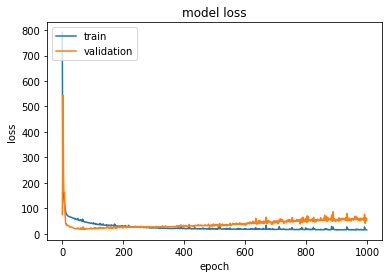

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
Xnew = np.array([['0.006320','18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']])
ynew=model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=['0.006320' '18.000000' '2.310000' '0.000000' '0.538000' '6.575000'
 '65.200000' '4.090000' '1.000000' '296.000000' '15.300000' '396.900000'
 '4.980000'], Predicted=[33.0762]
